# EDA

In [1]:
##Loading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv("data.csv",parse_dates = True)
data.head()

,DATE_KEY,OFFRNG_ID,GEO_ID,NO_OF_OPRTNTY_CREATD,NO_OF_WINS,DATE
0,42901,194,15,1,1,2017-06-15
1,42901,194,46,1,0,2017-06-15
2,42901,194,224,0,1,2017-06-15
3,42901,194,46,1,0,2017-06-15
4,42901,194,224,0,1,2017-06-15


In [2]:
##shape of the dataset
print("The shape of the dataset is {}".format(data.shape))

The shape of the dataset is (200000, 6)


In [3]:
##renaming the columns
data.columns = [x.lower() for x in data.columns]

In [4]:
##Inspecting date_key and DATE
len(data['date_key'].value_counts()) == len(data['date'].value_counts())

True

In [5]:
##no of offers
len(pd.unique(data['offrng_id']))

67

In [6]:
##no of locations where offers were given
len(pd.unique(data['geo_id']))

190

In [7]:
##making date as the index
data.index = pd.to_datetime(data.date)

In [8]:
data.head()

,date_key,offrng_id,geo_id,no_of_oprtnty_creatd,no_of_wins,date
date,,,,,,
2017-06-15,42901,194,15,1,1,2017-06-15
2017-06-15,42901,194,46,1,0,2017-06-15
2017-06-15,42901,194,224,0,1,2017-06-15
2017-06-15,42901,194,46,1,0,2017-06-15
2017-06-15,42901,194,224,0,1,2017-06-15


In [9]:
##no unique time stamps:-
len(pd.unique(data.index))

##Thus duplicate indexes..

677

In [10]:
##anlaysis on the basis of the indexes..
gp_mean = data.groupby(level = 0).mean()
gp_count = data.groupby(level = 0).count()
gp_sum = data.groupby(level = 0).sum()

In [11]:
##Plotting the distribution:--
import seaborn as sns
sns.set(color_codes = True)
'''
The important features are 
1) gp_sum['no_of_oprtnty_created']   --->total no of oppurtinuty created during that timestamp.
2) gp_sum['no_of_wins']              --->total no of wins during that time stamp.

3)gp_mean['no_pf_oprtnty_created']
4)gp_mean['no_of_wins']

5)gp_count['date']                   --->active dates for the offers  or no of offers.

'''

"\nThe important features are \n1) gp_sum['no_of_oprtnty_created']   --->total no of oppurtinuty created during that timestamp.\n2) gp_sum['no_of_wins']              --->total no of wins during that time stamp.\n\n3)gp_mean['no_pf_oprtnty_created']\n4)gp_mean['no_of_wins']\n\n5)gp_count['date']                   --->active dates for the offers  or no of offers.\n\n"

Text(0.5,1,'PLOT')

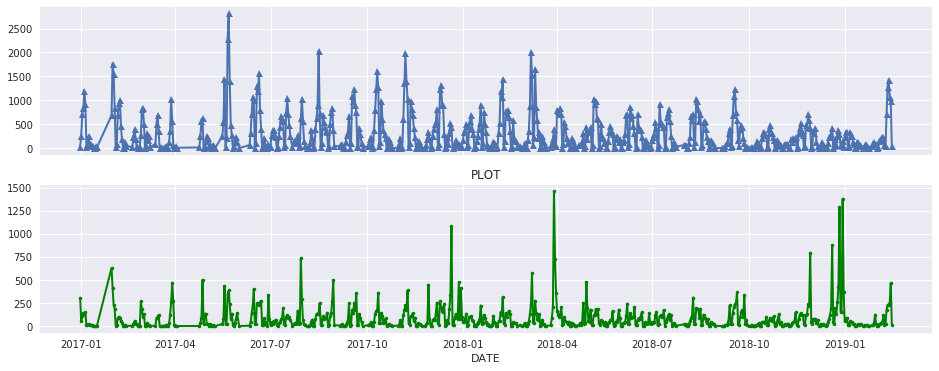

In [12]:
##plot sum vs DATE
fig,axes = plt.subplots(nrows = 2,ncols = 1,sharex = True,sharey = False,figsize = (16,6))
axes[0].plot(gp_sum.index,gp_sum['no_of_oprtnty_creatd'],marker = '^',linewidth = 2,label = 'no_of_oprtnty_created')
axes[1].plot(gp_sum.index,gp_sum['no_of_wins'],marker = '.',linewidth = 2,label = 'no_of_wins',color = 'green')
plt.xlabel("DATE")
plt.title("PLOT")

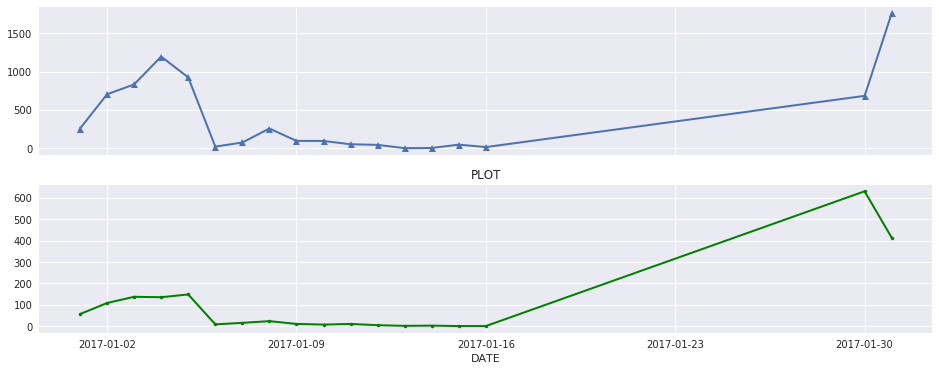

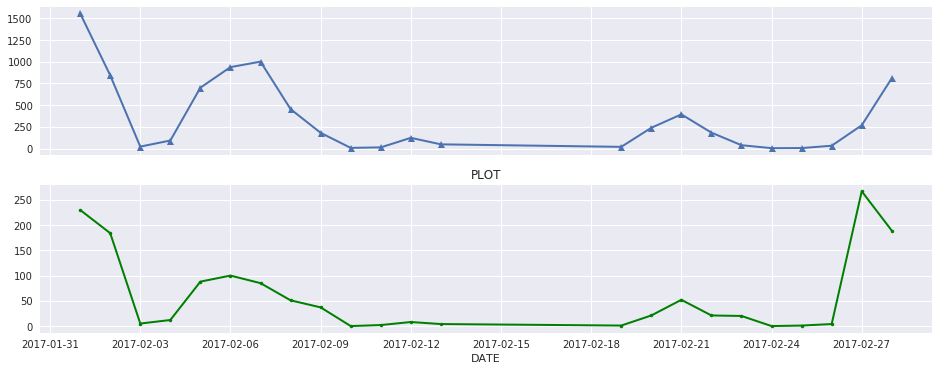

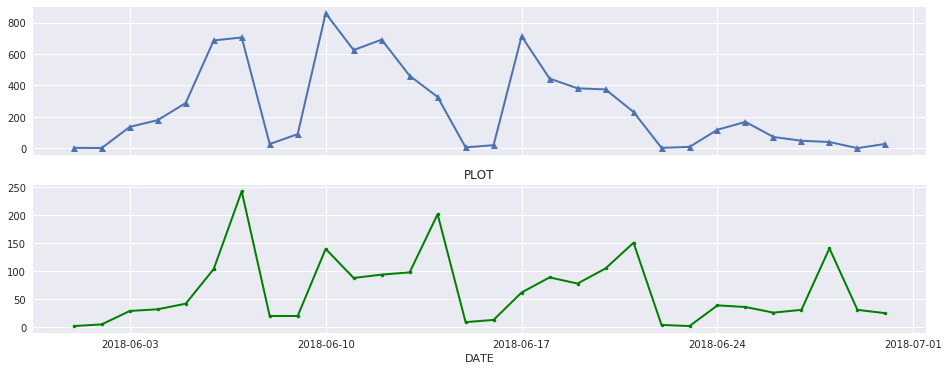

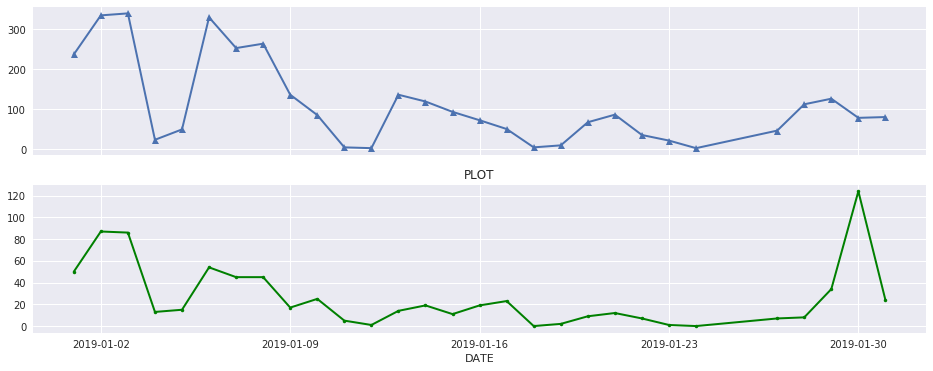

In [13]:
##Lets zoom in 
for index_date in ['2017-01','2017-02','2018-06','2019-01']:
    sub_date = gp_sum[index_date]
    fig,axes = plt.subplots(nrows = 2,ncols = 1,sharex = True,sharey = False,figsize = (16,6))
    axes[0].plot(sub_date.index,sub_date['no_of_oprtnty_creatd'],marker = '^',linewidth = 2,label = 'no_of_oprtnty_created')
    axes[1].plot(sub_date.index,sub_date['no_of_wins'],marker = '.',linewidth = 2,label = 'no_of_wins',color = 'green')
    plt.xlabel("DATE")
    plt.title("PLOT")

In [14]:
##One thing we can say that at the begenning of month subscription increases and at month end less subscriptions
##happens

##from the graph it is clear that no of wins is some what dependent to no of oppertunity created.

Text(0.5,1,'PLOT')

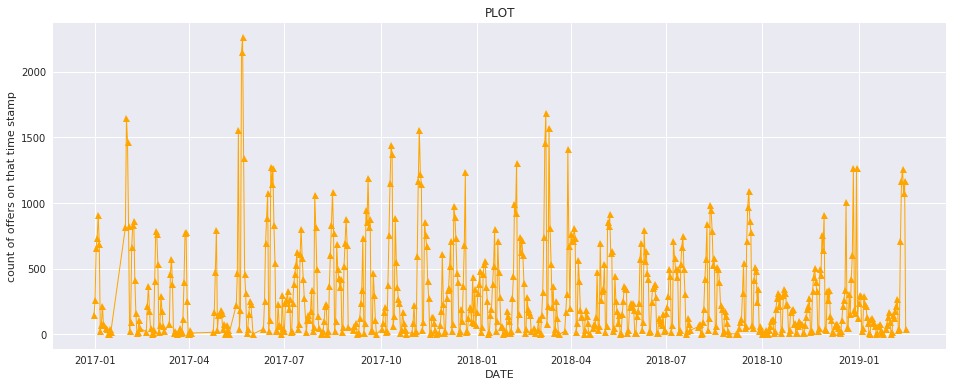

In [15]:
##inspecting no of offers.
plt.figure(figsize = (16,6))
plt.plot(gp_count.index,gp_count['date'],marker = '^',linewidth = 1,color = 'orange',label = 'no of offers')
plt.xlabel("DATE")
plt.ylabel("count of offers on that time stamp")
plt.title("PLOT")

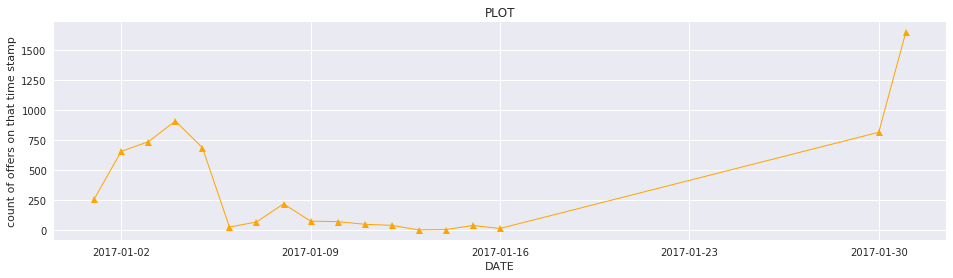

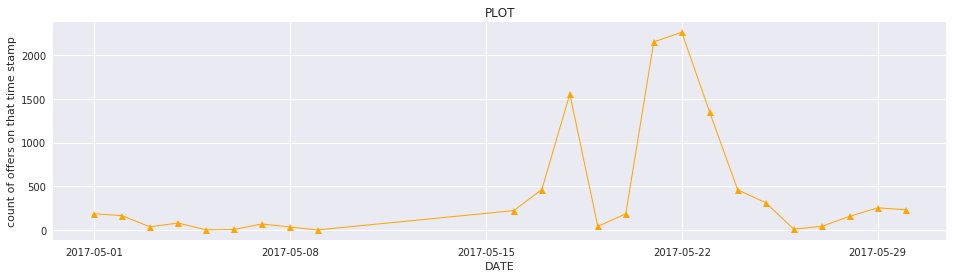

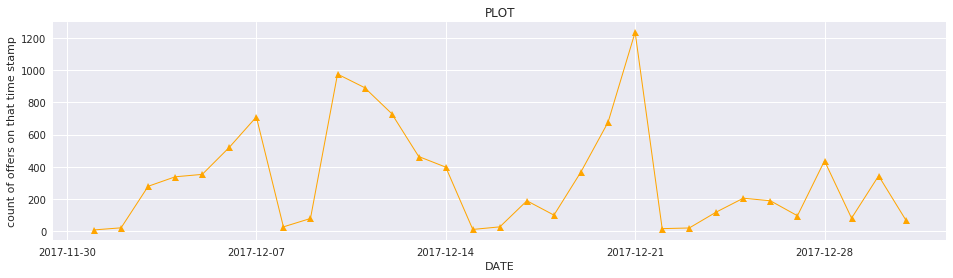

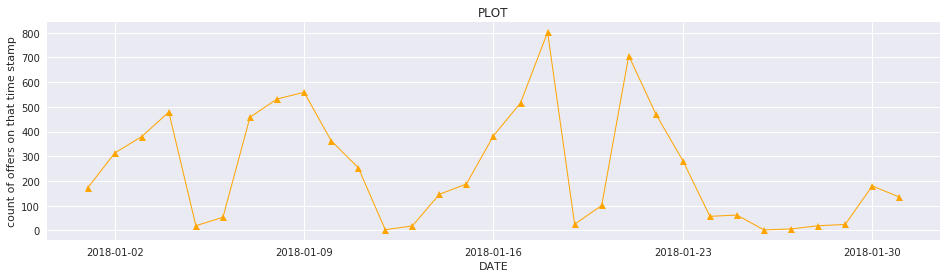

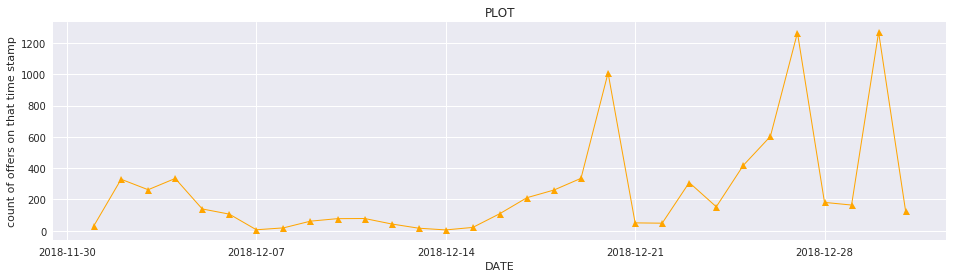

In [16]:
##zooming in:---

for index_date in ['2017-01','2017-05','2017-12','2018-01','2018-12']:
    sub_data = gp_count[index_date]
    plt.figure(figsize = (16,4))
    plt.plot(sub_data.index,sub_data['date'],marker = '^',linewidth = 1,color = 'orange',label = 'no of offers')
    plt.xlabel("DATE")
    plt.ylabel("count of offers on that time stamp")
    plt.title("PLOT")
    plt.show()

In [17]:
#gp_count['weekday'] = [i.weekday() for i in gp_count.index]
##simulation
for i in ['2017-01','2017-09','2018-9','2019-01']:
    plt.figure(figsize = (16,4))
    sub_date = gp_count[i]
    plt.bar(sub_date['weekday'],sub_date['date'])
    plt.title("Distribution of offers by days")

##Day-4 is Friday:--
##On friday less offers were given...

KeyError: 'weekday'

<Figure size 1152x288 with 0 Axes>

Text(0.5,1,'PLOT')

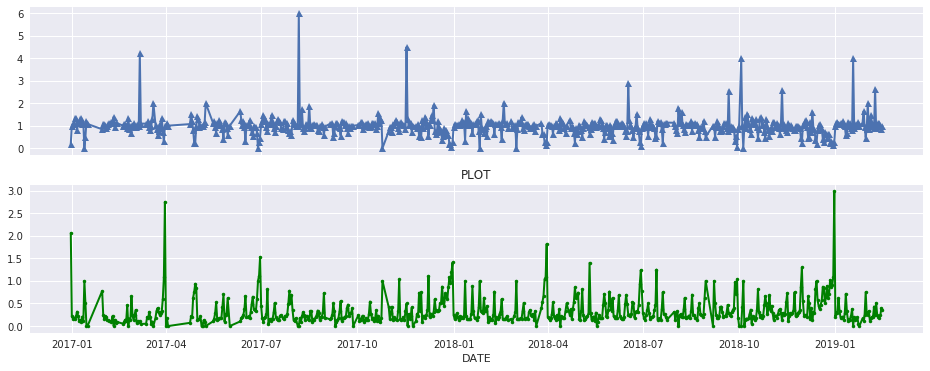

In [18]:
##Plotting mean distribution
fig,axes = plt.subplots(nrows = 2,ncols = 1,sharex = True,sharey = False,figsize = (16,6))
axes[0].plot(gp_mean.index,gp_mean['no_of_oprtnty_creatd'],marker = '^',linewidth = 2,label = 'no_of_oprtnty_created')
axes[1].plot(gp_mean.index,gp_mean['no_of_wins'],marker = '.',linewidth = 2,label = 'no_of_wins',color = 'green')
plt.xlabel("DATE")
plt.title("PLOT")

##One thing is clear from the plot is there are some spikes which might be tyyhe holidays or some special days
## so more offers were given ...(BLUE plot)

# EDA-2

In [ ]:
data.head(7)

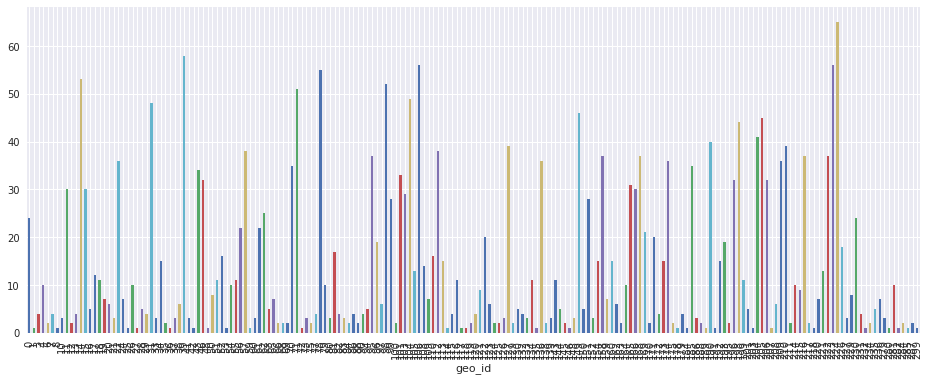

In [19]:
##no of unique offrng id per geo_locations:--
num_offers = data.groupby('geo_id')['offrng_id'].nunique()
#print(num_offers)
num_offers.plot(kind = 'bar',figsize = (16,6))

# FEATURE ENGINEERING

In [20]:
##Creating date features:--
data = pd.read_csv("data.csv",index_col = [5],parse_dates = [5])
data.head()

,DATE_KEY,OFFRNG_ID,GEO_ID,NO_OF_OPRTNTY_CREATD,NO_OF_WINS
DATE,,,,,
2017-06-15,42901,194,15,1,1
2017-06-15,42901,194,46,1,0
2017-06-15,42901,194,224,0,1
2017-06-15,42901,194,46,1,0
2017-06-15,42901,194,224,0,1


In [21]:
##changing the column names
data.columns = ['key','offer_id','geo_id','opp','wins']

In [22]:
data.head()
##as of now we do not need key
del data['key']

In [23]:
data.head()
##target variable is opp and wins.

,offer_id,geo_id,opp,wins
DATE,,,,
2017-06-15,194,15,1,1
2017-06-15,194,46,1,0
2017-06-15,194,224,0,1
2017-06-15,194,46,1,0
2017-06-15,194,224,0,1


In [24]:
##creating date time features:--
data['date'] = data.index
data['dayofweek'] = data['date'].dt.dayofweek
data['quarter'] = data['date'].dt.quarter
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['dayofyear'] = data['date'].dt.dayofyear
data['dayofmonth'] = data['date'].dt.day
data['weekofyear'] = data['date'].dt.weekofyear

data.head()

,offer_id,geo_id,opp,wins,date,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
DATE,,,,,,,,,,,,
2017-06-15,194,15,1,1,2017-06-15,3,2,6,2017,166,15,24
2017-06-15,194,46,1,0,2017-06-15,3,2,6,2017,166,15,24
2017-06-15,194,224,0,1,2017-06-15,3,2,6,2017,166,15,24
2017-06-15,194,46,1,0,2017-06-15,3,2,6,2017,166,15,24
2017-06-15,194,224,0,1,2017-06-15,3,2,6,2017,166,15,24


In [25]:
##deleting useless features:--
del data['date']

In [26]:
##feature no of offer_id per geo locations:--
num_offers = data.groupby('geo_id')['offer_id'].nunique()
gp_df = pd.DataFrame({'geo_id':num_offers.index,'num_offers':num_offers})

In [27]:
data = pd.merge(data,gp_df,on = 'geo_id')
data.head()


/home/ankit/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: 'geo_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


,offer_id,geo_id,opp,wins,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,num_offers
0,194,15,1,1,3,2,6,2017,166,15,24,30
1,194,15,1,0,0,2,6,2017,170,19,25,30
2,194,15,1,0,5,2,6,2017,168,17,24,30
3,194,15,1,0,3,2,5,2017,124,4,18,30
4,194,15,1,0,0,2,5,2017,128,8,19,30


In [28]:
data.head()

,offer_id,geo_id,opp,wins,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,num_offers
0,194,15,1,1,3,2,6,2017,166,15,24,30
1,194,15,1,0,0,2,6,2017,170,19,25,30
2,194,15,1,0,5,2,6,2017,168,17,24,30
3,194,15,1,0,3,2,5,2017,124,4,18,30
4,194,15,1,0,0,2,5,2017,128,8,19,30


In [29]:
##using XGBOOSt

##train  and validation partition
train = data[:int(0.7*(len(data)))]
valid = data[int(0.7*(len(data))):]

y_train = train[['opp','wins']]
y_valid = valid[['opp','wins']]

In [30]:
del train['opp']
del train['wins']
del valid['opp']
del valid['wins']

In [31]:
##calling multioutput regressor
from sklearn.multioutput import MultiOutputRegressor
import xgboost as xgb

regr_multirf = MultiOutputRegressor(xgb.XGBRegressor(n_estimators = 100,max_depth = 2))
regr_multirf.fit(train,y_train)

MultiOutputRegressor(estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
           n_jobs=None)

In [32]:
##prediction on new dataset:--
y_pred = regr_multirf.predict(valid)

In [33]:
y_pred = y_pred.round()

In [34]:
y_pred = pd.DataFrame(data=y_pred[0:,0:],    # values
             columns = ['opp','wins']) 

In [35]:
##using mean squared error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_valid['opp'],y_pred['opp']))

3.023216666666667


In [36]:
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_valid['opp'],y_pred['opp']))

3.023216666666667


In [37]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_valid['wins'],y_pred['wins']))

0.34358333333333335


In [38]:
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_valid['wins'],y_pred['wins']))

0.34358333333333335


In [ ]:
## A few results I want you to understand:--

'''
if you increase the training size then it is going to perform well... I got a result of 0.08 mse with n-estimators
100 and max-depth of 5,,while mean_absolue error was 0.0..
Which might be overfillting so you must try once K FOLD CROSS VALIDATION..

'''

In [ ]:
y_pred['wins'].value_counts()

In [ ]:
y_pred['opp'].value_counts()

In [ ]:
y_valid['opp'].value_counts()


##NOTE:--
'''
It did not able to capture other values because of low training example.
'''

In [ ]:
y_valid['wins'].value_counts()

In [54]:
regr_multirf_4 = MultiOutputRegressor(xgb.XGBRegressor(n_estimators = 1000,max_depth = 4))
regr_multirf_4.fit(train,y_train)

MultiOutputRegressor(estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
           n_jobs=None)

In [59]:
y_pred1 = regr_multirf_4.predict(valid)

In [60]:
y_pred1 = y_pred1.round()

y_pred1 = pd.DataFrame(data=y_pred1[0:,0:],    # values
             columns = ['opp','wins']) 

In [64]:
valid['opp'] = y_valid['opp']
valid['wins'] = y_valid['wins']
valid['opp_pred'] = y_pred['opp'].values
valid['wins_pred']  =y_pred['wins'].values
valid.head()

/home/ankit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ankit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ankit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

,offer_id,geo_id,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,num_offers,opp,wins,opp_pred,wins_pred
140000,189,78,0,1,2,2017,58,27,9,55,1,0,1.0,0.0
140001,263,78,0,1,2,2017,58,27,9,55,0,1,1.0,0.0
140002,271,78,0,1,2,2017,58,27,9,55,0,1,1.0,0.0
140003,194,78,1,1,2,2017,59,28,9,55,1,0,1.0,0.0
140004,194,78,2,3,9,2017,263,20,38,55,0,1,1.0,0.0


In [63]:
##using mean squared error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_valid['opp'],y_pred['opp']))

3.023216666666667


In [65]:
valid.head()

,offer_id,geo_id,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,num_offers,opp,wins,opp_pred,wins_pred
140000,189,78,0,1,2,2017,58,27,9,55,1,0,1.0,0.0
140001,263,78,0,1,2,2017,58,27,9,55,0,1,1.0,0.0
140002,271,78,0,1,2,2017,58,27,9,55,0,1,1.0,0.0
140003,194,78,1,1,2,2017,59,28,9,55,1,0,1.0,0.0
140004,194,78,2,3,9,2017,263,20,38,55,0,1,1.0,0.0


In [66]:
##Taking for offer_id 189 and geo_id 78
test_1 = valid.loc[(valid['offer_id'] == 189 ) & (valid['geo_id'] == 78)]

/home/ankit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/ankit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


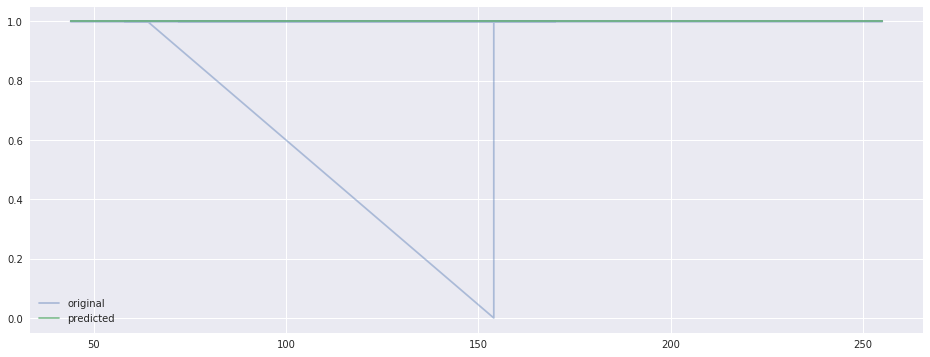

In [74]:
##plotting
plt.figure(figsize = (16,6))

valid['opp_pred'] = valid['opp_pred'].astype('int')
valid['wins_pred'] = valid['wins_pred'].astype('int')

plt.plot(test_1['dayofyear'],test_1['opp'],label = 'original',alpha = 0.4)
plt.plot(test_1['dayofyear'],test_1['opp_pred'],label = 'predicted',alpha = 0.7)
plt.legend()

In [69]:
valid.head()

,offer_id,geo_id,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,num_offers,opp,wins,opp_pred,wins_pred
140000,189,78,0,1,2,2017,58,27,9,55,1,0,1,0
140001,263,78,0,1,2,2017,58,27,9,55,0,1,1,0
140002,271,78,0,1,2,2017,58,27,9,55,0,1,1,0
140003,194,78,1,1,2,2017,59,28,9,55,1,0,1,0
140004,194,78,2,3,9,2017,263,20,38,55,0,1,1,0


In [ ]:
similarly you can experiment...

Note:--
    
    The dataset have duplicate indexes so it is really difficult to plot these.
    so you need to aggregate these.
    for these type of problems we use evaluation metric so solve the problem..
    lesses the error stronger the model is..

    
For modelling part you can experiment with 
    n_estimators and max_depth.